# Comparative analysis of models using quantitative measures. (F-measures, confusion Matrix, RMSE etc.).

**Important Model Evaluation Metrics for Machine Learning**\

**Confusion Matrix**

**F1 Score**

**Root Mean Squared Error**

**Mean Squared Error**



In [0]:
import pandas as pd
import math as mt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train=pd.read_csv('/content/drive/My Drive/titanic_train.csv')
train.drop('Cabin',axis=1,inplace=True)
train.dropna(inplace=True)
train.head()

In [14]:
#Converting Categorical Features
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
#drop the sex,embarked,name and tickets columns\n",
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
#concatenate new sex and embark column to our train dataframe\n"
train = pd.concat([train,sex,embark],axis=1)
#check the head of dataframe\n"
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [0]:
X_train,X_test,y_train,y_test=train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.30,random_state=101)
logreg = LogisticRegression(max_iter=1000,)
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)


**Confusion Matrix**


A confusion matrix is an N X N matrix, where N is the number of classes being predicted. For the problem in hand, we have N=2, and hence we get a 2 X 2 matrix. Here are a few definitions, you need to remember for a confusion matrix :

Accuracy : the proportion of the total number of predictions that were correct.
Positive Predictive Value or Precision : the proportion of positive cases that were correctly identified.
Negative Predictive Value : the proportion of negative cases that were correctly identified.
Sensitivity or Recall : the proportion of actual positive cases which are correctly identified.
Specificity : the proportion of actual negative cases which are correctly identified.
confusion matrix

<img src = "Confusion_matrix.png" height = 1000 width = "500"/>
<img src = "Confusion_matrix1.png" height = 200 width = "300"/>

confusion matrix

The accuracy for the problem in hand comes out to be 88%.  As you can see from the above two tables, the Positive predictive Value is high, but negative predictive value is quite low. Same holds for Sensitivity and Specificity. This is primarily driven by the threshold value we have chosen. If we decrease our threshold value, the two pairs of starkly different numbers will come closer.

In general we are concerned with one of the above defined metric. For instance, in a pharmaceutical company, they will be more concerned with minimal wrong positive diagnosis. Hence, they will be more concerned about high Specificity. On the other hand an attrition model will be more concerned with Sensitivity. Confusion matrix are generally used only with class output models.

In [17]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[110,  18],
       [ 24,  62]])

**F1_SCORE**

The F score, also called the F1 score or F measure, is a measure of a test’s accuracy. The F score is defined as the weighted harmonic mean of the test’s precision and recall. This score is calculated according to:

<img src="F1_score.png" height="1000" width="400"/> 

with the precision and recall of a test taken into account. Precision, also called the positive predictive value, is the proportion of positive results that truly are positive. Recall, also called sensitivity, is the ability of a test to correctly identify positive results to get the true positive rate. The F score reaches the best value, meaning perfect precision and recall, at a value of 1. The worst F score, which means lowest precision and lowest recall, would be a value of 0.

In [18]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F-Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.8037383177570093
Precision: 0.775
Recall: 0.7209302325581395
F-Score: 0.7469879518072289


**Mean Squared Error and Root Mean Squared Error**

MSE is the average of the squared error that is used as the loss function for least squares regression:
<img src="mse.jpg" height="1000" width="500"/>

It is the sum, over all the data points, of the square of the difference between the predicted and actual target variables, divided by the number of data points.

RMSE is the square root of MSE. MSE is measured in units that are the square of the target variable, while RMSE is measured in the same units as the target variable. Due to its formulation, MSE, just like the squared loss function that it derives from, effectively penalizes larger errors more severely.

squared boolean value, optional (default = True)
If True returns MSE value, if False returns RMSE value. 

In [19]:
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
print("RMSE:",mt.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE: 0.19626168224299065
RMSE: 0.4430143138127601


**Area Under the ROC curve (AUC – ROC)**

This is again one of the popular metrics used in the industry.  The biggest advantage of using ROC curve is that it is independent of the change in proportion of responders. This statement will get clearer in the following sections.

Let’s first try to understand what is ROC (Receiver operating characteristic) curve. If we look at the confusion matrix below, we observe that for a probabilistic model, we get different value for each metric.
<img src="roc1.png" height=1000 width=500/>


Hence, for each sensitivity, we get a different specificity.The two vary as follows:
<img src="roc2.png" height=1000 width=500/>

The ROC curve is the plot between sensitivity and (1- specificity). (1- specificity) is also known as false positive rate and sensitivity is also known as True Positive rate. Following is the ROC curve for the case in hand.

<img src="roc3.png" height=1000 width=500/>

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.840


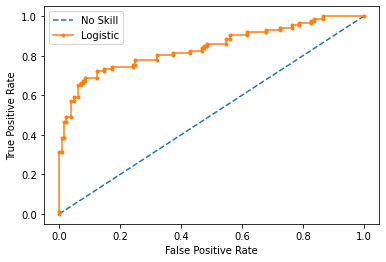

In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = logreg.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()